In [4]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [6]:
abo_path = 'spam_or_not_spam.csv'
p_df_raw = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [17]:
p_df_raw.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [8]:
X = p_df_raw['email']
y = p_df_raw['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
cv = CountVectorizer() 

#`data` is an array of strings

tdata = cv.fit_transform(X_train.values.astype('U')) 

In [36]:
tdata

<2250x30313 sparse matrix of type '<class 'numpy.int64'>'
	with 261973 stored elements in Compressed Sparse Row format>

In [37]:
ft.toarray()

AttributeError: 'list' object has no attribute 'toarray'

In [26]:
ft = cv.get_feature_names() 
result = list(map(lambda row:dict(zip(ft,row)),tdata.toarray()))

In [29]:
#result[0:2]

In [33]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])
#text_clf = Pipeline([('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])

In [35]:
text_clf.fit(X_train.values.astype('U'), y_train) 
#text_clf.fit(X_train.values, y_train) 

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [18]:
predicted = text_clf.predict(X_test.values.astype('U'))

In [19]:
from sklearn import metrics 
array = metrics.confusion_matrix(y_test, predicted) 

<AxesSubplot:>

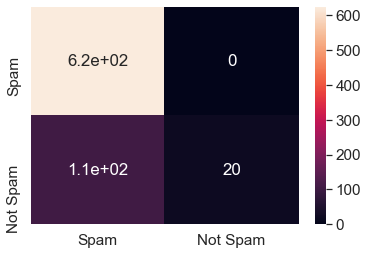

In [20]:
import seaborn as sn 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

df_cm = pd.DataFrame(array, ["Spam","Not Spam"], 
["Spam","Not Spam"]) 

sn.set(font_scale=1.4)#for label size 
sn.heatmap(df_cm, annot=True)# font size

In [16]:
print(metrics.classification_report(y_test, predicted, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.85      1.00      0.92       617
    Not Spam       1.00      0.18      0.31       133

    accuracy                           0.85       750
   macro avg       0.92      0.59      0.61       750
weighted avg       0.88      0.85      0.81       750

